In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"BostonHousing.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.06905,0.0,7.07,0,0.458,7.147,54.2,,3,222,18.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I. About the Data 
The Boston Housing dataset contains data collected by the US Census Service concerning housing 
around Boston Massachusetts. It was obtained from the StatLib archive 
(http://lib.stat.cmu.edu/datasets/boston). The dataset has 167 cases. 
The data was originally published by Harrison Jr., David, and Daniel L. Rubinfeld. "Hedonic 
housing prices and the demand for clean air." Journal of environmental economics and 
management 5.1 (1978): 81-102. 
The BostonHousing.xlsx dataset has 11 attributes. The dataset comes with different 
imperfections (missing and outliers). As described earlier, most algorithms will not process 
records with these imperfections.

In the code df = pd.read_csv(r"BostonHousing.csv"), the letter r before the string is a prefix indicating a raw string in Python. n the context of your provided code, the r might not be strictly necessary since the string "BostonHousing.csv" doesn't contain any characters that need escaping. However, using r out of habit can prevent potential issues when working with strings that contain backslashes.

In [2]:
df.isnull().sum()

CRIM             0
ZN               0
INDUS           20
CHAS             0
NOX              2
RM               0
AGE              0
DIS              3
RAD              0
TAX              0
PTRATIO          0
Unnamed: 11    167
Unnamed: 12    167
Unnamed: 13    167
Unnamed: 14    167
Unnamed: 15    167
Unnamed: 16    167
Unnamed: 17    167
Unnamed: 18    167
dtype: int64

In [3]:
housing_df=df.drop(df.columns[11:19],axis=1)

In [4]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,0.06905,0.0,7.07,0,0.458,7.147,54.2,,3,222,18.7


In [5]:
housing_df.isnull().sum()

CRIM        0
ZN          0
INDUS      20
CHAS        0
NOX         2
RM          0
AGE         0
DIS         3
RAD         0
TAX         0
PTRATIO     0
dtype: int64

In [6]:
missing_cells=housing_df[housing_df.isna().any(axis=1)]

In [7]:
missing_cells

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
11,0.11747,12.5,NaN,0,0.524,6.009,82.9,6.2267,5,311,15.2
13,0.62976,0.0,8.14,0,NaN,5.949,61.8,4.7075,4,307,0.23
24,0.75026,0.0,NaN,0,0.538,5.924,94.1,4.3996,4,307,21
37,0.08014,0.0,NaN,0,0.499,5.850,41.5,3.9342,5,279,19.2
38,0.17505,0.0,NaN,0,0.499,5.966,30.2,3.8473,5,279,19.2
40,0.03359,75.0,NaN,0,0.428,7.024,15.8,5.4011,3,252,18.3
50,0.08873,21.0,NaN,0,0.439,5.963,45.7,6.8147,4,243,16.8
59,0.10328,25.0,NaN,0,0.453,5.927,47.2,6.932,8,284,19.7
61,0.17171,25.0,NaN,0,0.453,5.966,93.4,6.8185,8,284,19.7
76,0.10153,0.0,NaN,0,0.437,6.279,74.5,4.0522,5,398,18.7


In [8]:
missing_cells.shape

(24, 11)

### Highlighting the Null values

In [9]:
nullvalues_df = missing_cells.style.highlight_null('yellow')
nullvalues_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
11,0.117470,12.500000,nan,0,0.524,6.009000,82.900000,6.2267,5,311,15.2
13,0.629760,0.000000,8.14,0,nan,5.949000,61.800000,4.7075,4,307,0.23
24,0.750260,0.000000,nan,0,0.538,5.924000,94.100000,4.3996,4,307,21
37,0.080140,0.000000,nan,0,0.499,5.850000,41.500000,3.9342,5,279,19.2
38,0.175050,0.000000,nan,0,0.499,5.966000,30.200000,3.8473,5,279,19.2
40,0.033590,75.000000,nan,0,0.428,7.024000,15.800000,5.4011,3,252,18.3
50,0.088730,21.000000,nan,0,0.439,5.963000,45.700000,6.8147,4,243,16.8
59,0.103280,25.000000,nan,0,0.453,5.927000,47.200000,6.932,8,284,19.7
61,0.171710,25.000000,nan,0,0.453,5.966000,93.400000,6.8185,8,284,19.7
76,0.101530,0.000000,nan,0,0.437,6.279000,74.500000,4.0522,5,398,18.7


In [10]:
missing_cells.shape

(24, 11)

### Finding outliers in the PTRATIO predictor

In [11]:
#Looking for extreme values
PTRATIO_extreme=housing_df.sort_values(by='PTRATIO',ascending = True)

In [12]:
PTRATIO_extreme_top=PTRATIO_extreme.head(10)
PTRATIO_extreme_top

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
110,0.10793,0.0,NaN,0,0.52,6.195,54.4,2.7778,5,384,##
13,0.62976,0.0,8.14,0,NaN,5.949,61.8,4.7075,4,307,0.23
5,0.02985,0.0,****,0,0.458,6.430,58.7,6.0622,3,222,137
142,3.32105,0.0,19.58,1,&&&,5.403,100.0,1.3216,5,403,14.7
143,4.09740,0.0,19.58,0,0.871,5.468,100.0,1.4118,5,403,14.7
57,0.01432,100.0,1.32,0,0.411,6.816,40.5,8.3248,5,256,15.1
166,0.08664,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398,15.2
165,0.06911,45.0,3.44,0,0.437,6.739,30.8,6.4798,5,398,15.2
12,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2
11,0.11747,12.5,NaN,0,0.524,6.009,82.9,6.2267,5,311,15.2


In [13]:
def highlight_top_n_rows(val, n):
    return 'background-color: yellow' if val in PTRATIO_extreme['PTRATIO'].iloc[:n].values else ''

# Apply the custom styling function to the specific column
outliers_df = PTRATIO_extreme_top.style.applymap(lambda x: highlight_top_n_rows(x, 3), subset=['PTRATIO'])
outliers_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
110,0.107930,0.000000,nan,0,0.52,6.195000,54.400000,2.7778,5,384,##
13,0.629760,0.000000,8.14,0,nan,5.949000,61.800000,4.7075,4,307,0.23
5,0.029850,0.000000,****,0,0.458,6.430000,58.700000,6.0622,3,222,137
142,3.321050,0.000000,19.58,1,&&&,5.403000,100.000000,1.3216,5,403,14.7
143,4.097400,0.000000,19.58,0,0.871,5.468000,100.000000,1.4118,5,403,14.7
57,0.014320,100.000000,1.32,0,0.411,6.816000,40.500000,8.3248,5,256,15.1
166,0.086640,45.000000,3.44,0,0.437,7.178000,26.300000,6.4798,5,398,15.2
165,0.069110,45.000000,3.44,0,0.437,6.739000,30.800000,6.4798,5,398,15.2
12,0.093780,12.500000,7.87,0,0.524,5.889000,39.000000,5.4509,5,311,15.2
11,0.117470,12.500000,nan,0,0.524,6.009000,82.900000,6.2267,5,311,15.2


In [14]:
#We can see in the above column that there is a significance difference between the values in the above 3 cells
#and rest of the values. 

#### Checking the last 10 cells

In [15]:
PTRATIO_extreme_bottom=PTRATIO_extreme.tail(10)
PTRATIO_extreme_bottom

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
127,0.25915,0.0,21.89,0,0.624,5.693,96.0,1.7883,4,437,21.2
136,0.32264,0.0,21.89,0,0.624,5.942,93.5,1.9669,4,437,21.2
129,0.88125,0.0,NaN,0,0.624,5.637,94.7,1.9799,4,437,21.2
20,1.25179,0.0,8.14,0,0.538,5.570,98.1,3.7979,4,307,44
31,1.35472,0.0,8.14,0,0.538,6.072,100.0,4.175,4,307,46
34,1.61282,0.0,8.14,0,0.538,6.096,96.9,3.7598,4,307,47
145,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403,50.3
144,2.77974,0.0,19.58,0,0.871,4.903,97.8,1.3459,5,403,51.3
117,0.15098,0.0,10.01,0,0.547,6.021,82.6,2.7474,6,432,Adam
100,0.14866,0.0,8.56,0,0.52,6.727,79.9,2.7778,5,384,Alina


In [16]:
#We can see that there are some string values in the last 2 cells which is a case of entering non-numeric variables
def highlight_bottom_n_rows(val, n):
    return 'background-color: yellow' if val in PTRATIO_extreme['PTRATIO'].iloc[-n:].values else ''

# Apply the custom styling function to the specific column
outliers_df = PTRATIO_extreme_bottom.style.applymap(lambda x: highlight_bottom_n_rows(x, 2), subset=['PTRATIO'])
outliers_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
127,0.259150,0.000000,21.89,0,0.624,5.693000,96.000000,1.7883,4,437,21.2
136,0.322640,0.000000,21.89,0,0.624,5.942000,93.500000,1.9669,4,437,21.2
129,0.881250,0.000000,nan,0,0.624,5.637000,94.700000,1.9799,4,437,21.2
20,1.251790,0.000000,8.14,0,0.538,5.570000,98.100000,3.7979,4,307,44
31,1.354720,0.000000,8.14,0,0.538,6.072000,100.000000,4.175,4,307,46
34,1.612820,0.000000,8.14,0,0.538,6.096000,96.900000,3.7598,4,307,47
145,2.379340,0.000000,19.58,0,0.871,6.130000,100.000000,1.4191,5,403,50.3
144,2.779740,0.000000,19.58,0,0.871,4.903000,97.800000,1.3459,5,403,51.3
117,0.150980,0.000000,10.01,0,0.547,6.021000,82.600000,2.7474,6,432,Adam
100,0.148660,0.000000,8.56,0,0.52,6.727000,79.900000,2.7778,5,384,Alina


In [17]:
#Substituting the missing values with NaN
housing_df_na=housing_df.replace({' ': np.nan, '': np.nan, '****': np.nan, 'Adam': np.nan,'Alina':np.nan,
                                  'Sara':np.nan,'*****':np.nan,'&&&':np.nan,'##':np.nan},
                                 inplace=True)
housing_df_na=housing_df.fillna(np.nan)

In [18]:
housing_df_na.shape

(167, 11)

In [19]:
housing_df_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     167 non-null    float64
 1   ZN       167 non-null    float64
 2   INDUS    139 non-null    object 
 3   CHAS     167 non-null    int64  
 4   NOX      161 non-null    object 
 5   RM       167 non-null    float64
 6   AGE      167 non-null    float64
 7   DIS      163 non-null    object 
 8   RAD      167 non-null    int64  
 9   TAX      167 non-null    int64  
 10  PTRATIO  164 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 14.5+ KB


In [20]:
housing_df_na.iloc[70:80]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
70,0.08826,0.0,10.81,0,0.413,6.417,6.6,5.2873,4,305,19.2
71,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2
73,0.19539,0.0,10.81,0,0.413,6.245,6.2,5.2873,4,305,19.2
74,0.07896,0.0,12.83,0,0.437,6.273,6.0,4.2515,5,398,177
75,0.09512,0.0,12.83,0,0.437,6.286,45.0,4.5026,5,398,18.7
76,0.10153,0.0,NaN,0,0.437,6.279,74.5,4.0522,5,398,18.7
77,0.08707,0.0,NaN,0,0.437,6.140,45.8,4.0905,5,398,18.7
78,0.05646,0.0,12.83,0,0.437,6.232,53.7,5.0141,5,398,18.7
79,0.08387,0.0,12.83,0,0.437,5.874,36.6,4.5026,5,398,18.7


In [21]:
housing_df_reduced=housing_df_na.dropna()
housing_df_reduced

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
6,0.08829,12.5,7.07,0,0.524,6.012,66.6,5.5605,5,311,15.2
...,...,...,...,...,...,...,...,...,...,...,...
161,0.07875,45.0,3.44,0,0.437,6.782,41.1,3.7886,5,398,15.2
162,0.12579,45.0,3.44,0,0.437,6.556,29.1,4.5667,5,398,15.2
163,0.08370,45.0,3.44,0,0.437,7.185,38.9,4.5667,5,398,15.2
165,0.06911,45.0,3.44,0,0.437,6.739,30.8,6.4798,5,398,15.2


In [22]:
housing_df_reduced.shape

(129, 11)

In [23]:
housing_df_impute = housing_df_na.apply(lambda col: col.fillna(col.median()), axis=0)

In [24]:
housing_df_impute.tail(60)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
107,0.13117,0.0,8.56,0,0.52,6.127,85.2,2.1224,5,384,20.9
108,0.12802,0.0,8.56,0,0.52,6.474,97.1,2.4329,5,384,20.9
109,0.26363,0.0,8.56,0,0.52,6.229,91.2,2.5451,5,384,20.9
110,0.10793,0.0,8.14,0,0.52,6.195,54.4,2.7778,5,384,18.7
111,0.10084,0.0,10.01,0,0.499,6.715,81.6,2.6775,6,432,17.8
112,0.12329,0.0,10.01,0,0.547,5.913,92.9,2.3534,6,432,17.8
113,0.22212,0.0,10.01,0,0.547,6.092,95.4,2.548,6,432,17.8
114,0.14231,0.0,10.01,0,0.547,6.254,84.2,2.2565,6,432,17.8
115,0.17134,0.0,10.01,0,0.547,5.928,88.2,2.4631,6,432,17.8
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8


In [25]:
housing_df_na.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,0.06905,0.0,7.07,0,0.458,7.147,54.2,NaN,3,222,18.7
5,0.02985,0.0,NaN,0,0.458,6.430,58.7,6.0622,3,222,137
6,0.08829,12.5,7.07,0,0.524,6.012,66.6,5.5605,5,311,15.2
7,0.14455,12.5,NaN,0,0.524,6.172,96.1,5.9505,5,311,15.2
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2
9,0.17004,12.5,NaN,0,0.524,6.004,85.9,6.5921,5,311,15.2


In [26]:
housing_df_impute.describe()

,CRIM,ZN,CHAS,RM,AGE,RAD,TAX
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.295958,9.032934,0.005988,6.226030,66.055689,4.119760,314.658683
std,0.548701,19.952137,0.077382,0.512468,27.833354,1.320836,76.814420
min,0.006320,0.000000,0.000000,4.903000,2.900000,1.000000,188.000000
25%,0.067620,0.000000,0.000000,5.886500,44.200000,3.000000,263.000000
50%,0.122040,0.000000,0.000000,6.142000,69.700000,4.000000,307.000000
75%,0.223505,12.500000,0.000000,6.455000,92.050000,5.000000,384.000000
max,4.097400,100.000000,1.000000,8.069000,100.000000,8.000000,469.000000


In [27]:
housing_df_impute = housing_df_impute.astype('float64')

In [28]:
housing_df_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     167 non-null    float64
 1   ZN       167 non-null    float64
 2   INDUS    167 non-null    float64
 3   CHAS     167 non-null    float64
 4   NOX      167 non-null    float64
 5   RM       167 non-null    float64
 6   AGE      167 non-null    float64
 7   DIS      167 non-null    float64
 8   RAD      167 non-null    float64
 9   TAX      167 non-null    float64
 10  PTRATIO  167 non-null    float64
dtypes: float64(11)
memory usage: 14.5 KB


In [29]:
def replace_with_median(column):
    median = column[(column >= 10) & (column <= 50)].median()
    column[(column > 60) | (column < 10)] = median
    return column
housing_df_impute['PTRATIO'] = replace_with_median(housing_df_impute['PTRATIO'])

In [30]:
housing_df_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     167 non-null    float64
 1   ZN       167 non-null    float64
 2   INDUS    167 non-null    float64
 3   CHAS     167 non-null    float64
 4   NOX      167 non-null    float64
 5   RM       167 non-null    float64
 6   AGE      167 non-null    float64
 7   DIS      167 non-null    float64
 8   RAD      167 non-null    float64
 9   TAX      167 non-null    float64
 10  PTRATIO  167 non-null    float64
dtypes: float64(11)
memory usage: 14.5 KB


D. Compute the mean, median, min, max, and standard deviation for each of the quantitative 
variables. 

In [31]:
mean = housing_df_impute.mean()
median = housing_df_impute.median()
minimum = housing_df_impute.min()
maximum = housing_df_impute.max()
std_dev = housing_df_impute.std()

# Display the statistics
print("Mean:\n", mean)
print("\nMedian:\n", median)
print("\nMin:\n", minimum)
print("\nMax:\n", maximum)
print("\nStandard Deviation:\n", std_dev)


Mean:
 CRIM         0.295958
ZN           9.032934
INDUS        8.958084
CHAS         0.005988
NOX          0.505617
RM           6.226030
AGE         66.055689
DIS          4.165329
RAD          4.119760
TAX        314.658683
PTRATIO     19.452096
dtype: float64

Median:
 CRIM         0.12204
ZN           0.00000
INDUS        8.14000
CHAS         0.00000
NOX          0.49900
RM           6.14200
AGE         69.70000
DIS          3.97690
RAD          4.00000
TAX        307.00000
PTRATIO     18.70000
dtype: float64

Min:
 CRIM         0.00632
ZN           0.00000
INDUS        0.74000
CHAS         0.00000
NOX          0.39800
RM           4.90300
AGE          2.90000
DIS          1.32160
RAD          1.00000
TAX        188.00000
PTRATIO     14.70000
dtype: float64

Max:
 CRIM         4.0974
ZN         100.0000
INDUS       25.6500
CHAS         1.0000
NOX          0.8710
RM           8.0690
AGE        100.0000
DIS          9.2229
RAD          8.0000
TAX        469.0000
PTRATIO     51.3000


Plot a histogram for each of the quantitative variables. Based on the histograms and summary 
statistics, answer the following questions: 
i. Which variables have the largest variabilities?
ii. Which variables were seen skewed? 
iii. Are there any values that seem extreme?

### Which variables have the largest variabilities?

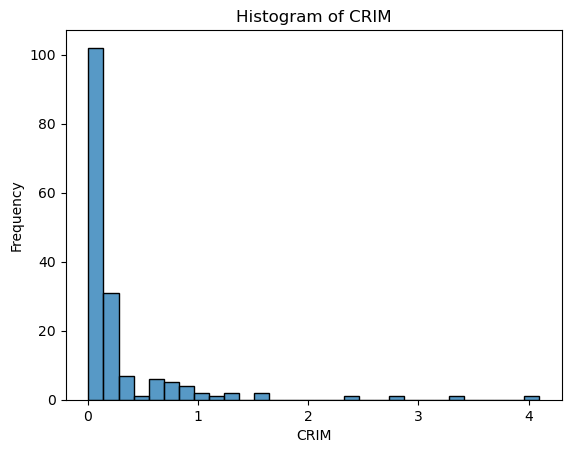

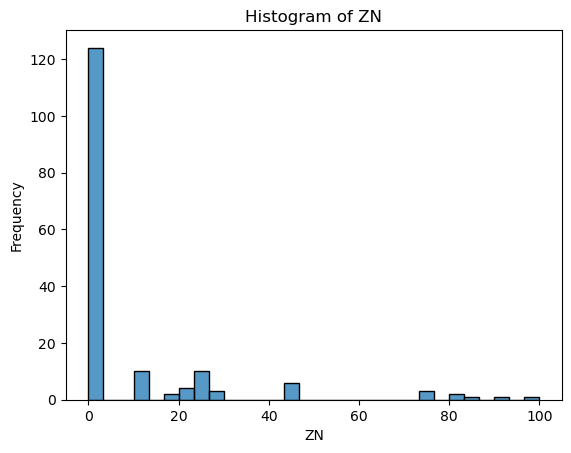

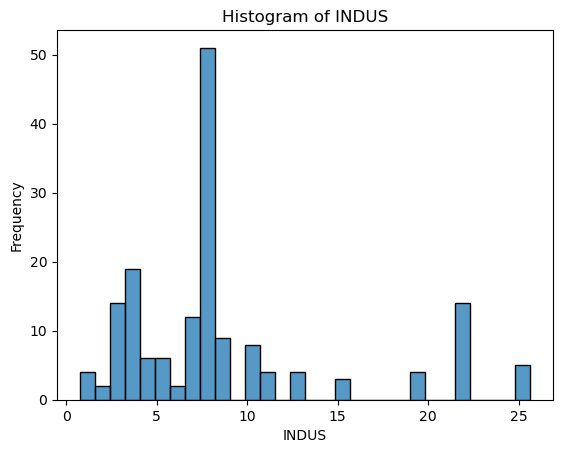

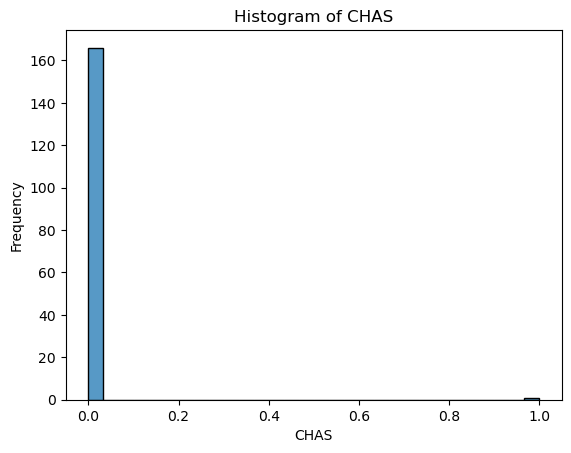

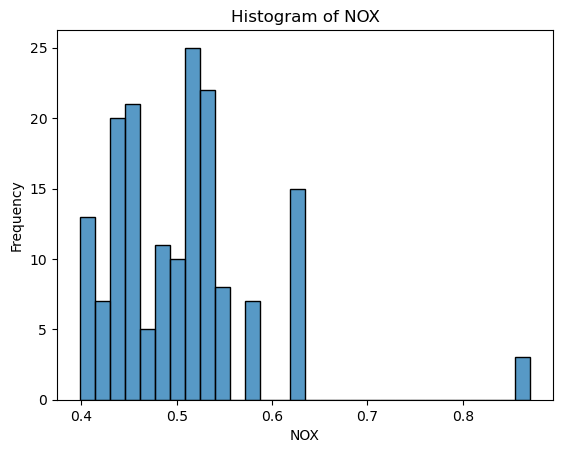

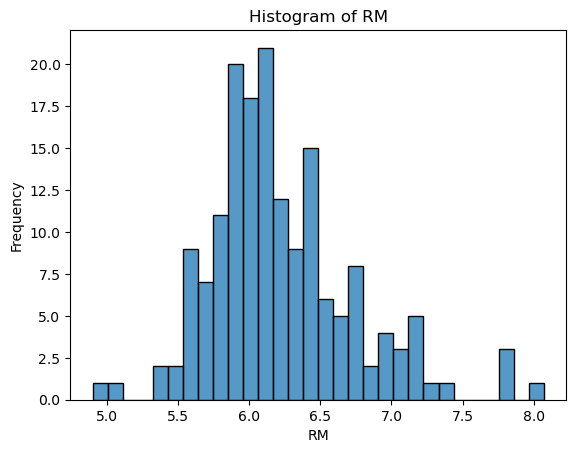

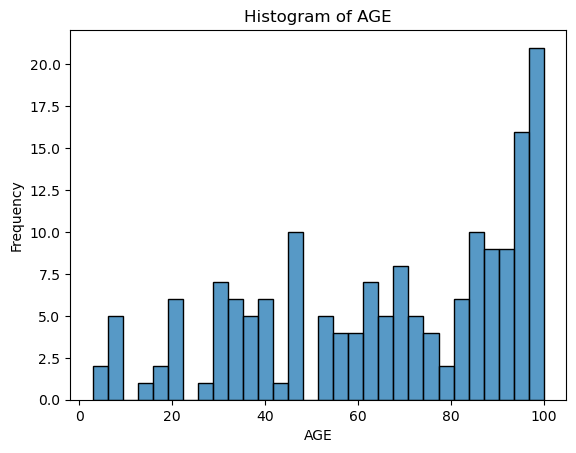

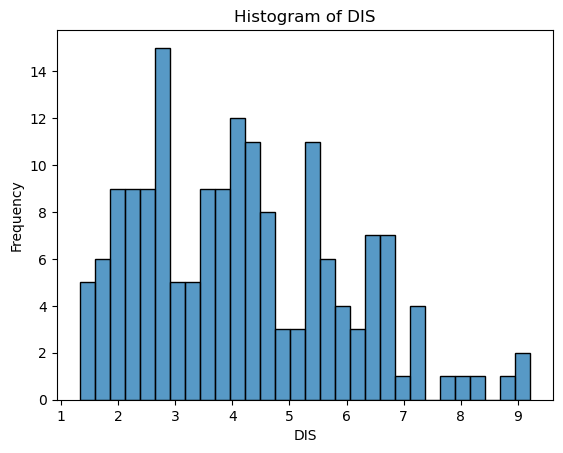

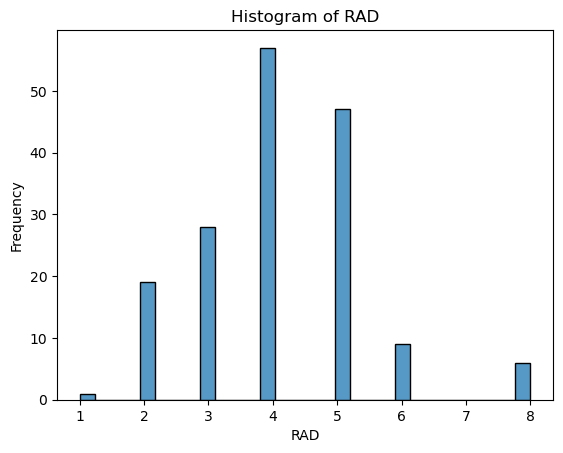

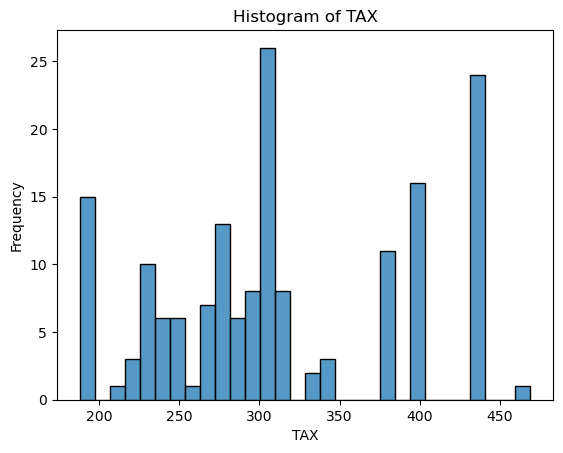

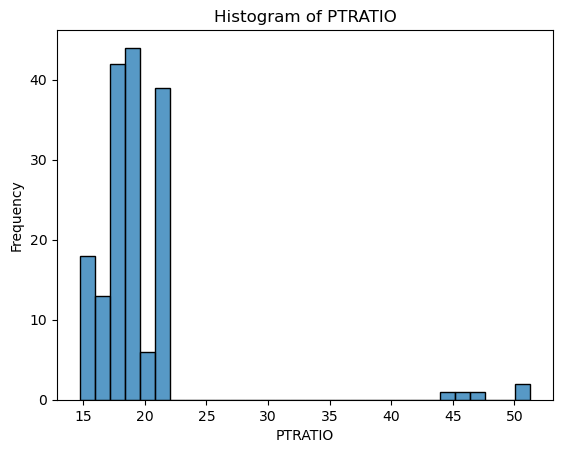

The variable with the largest variability is 'TAX' with a standard deviation of 76.81.


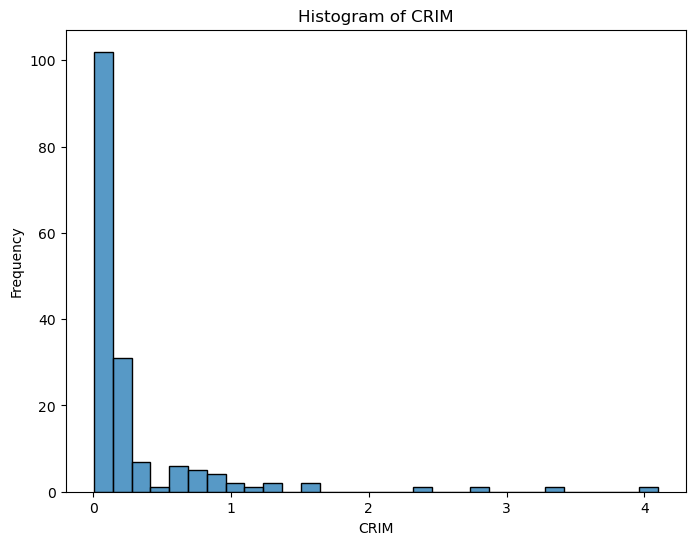

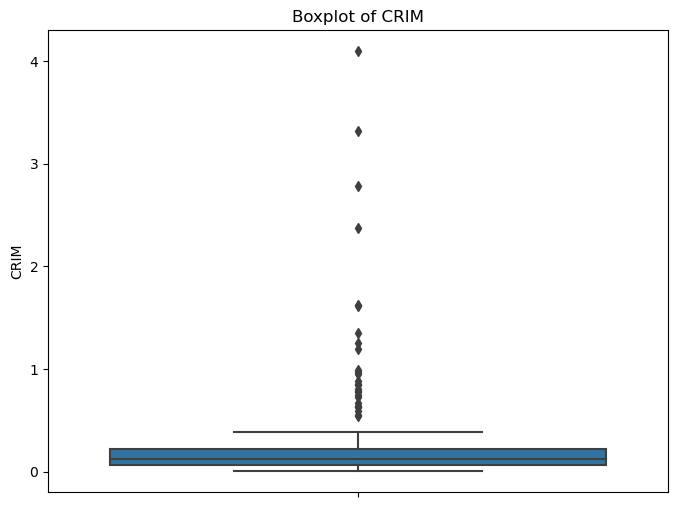

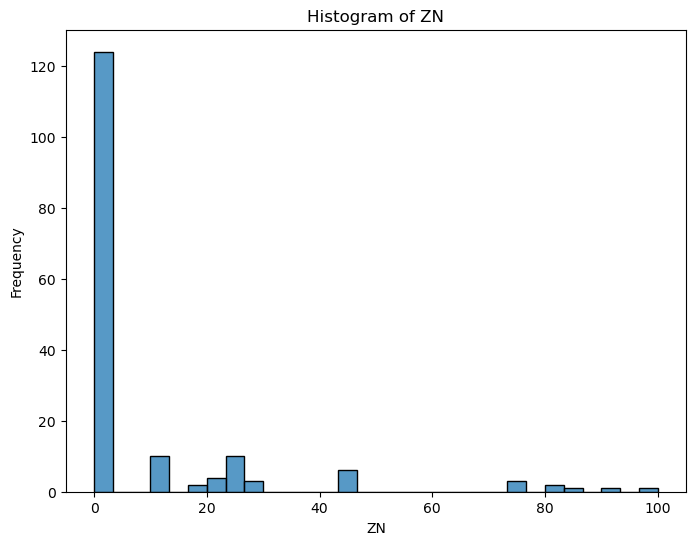

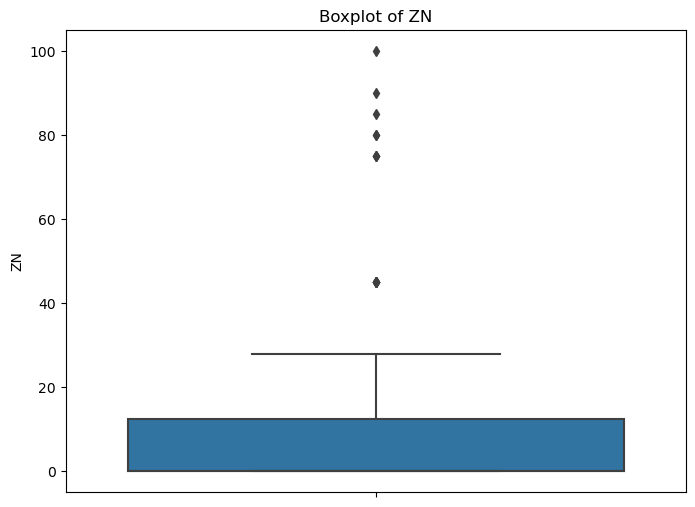

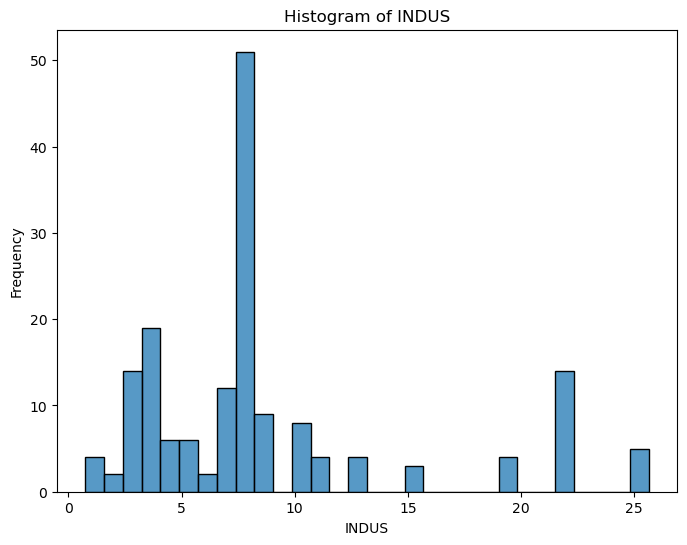

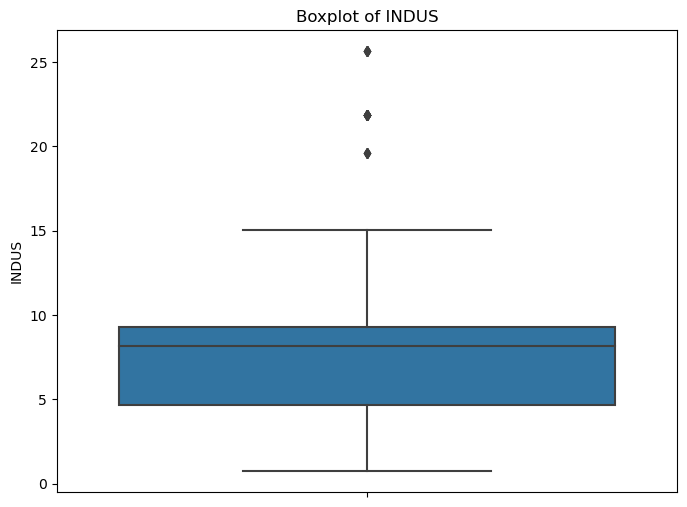

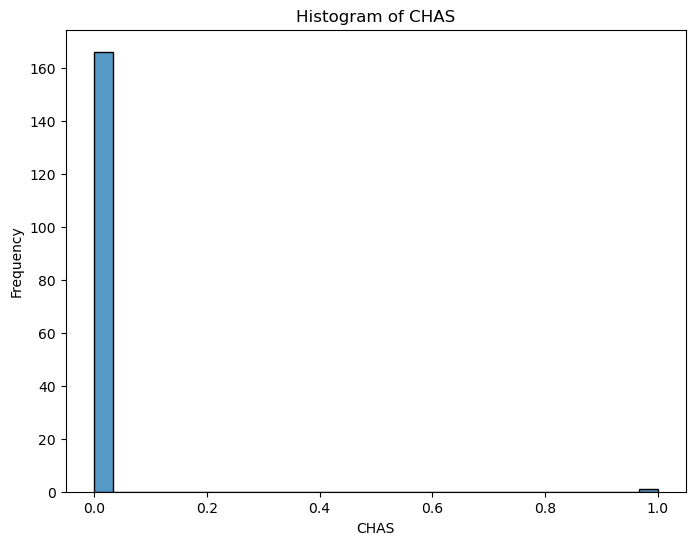

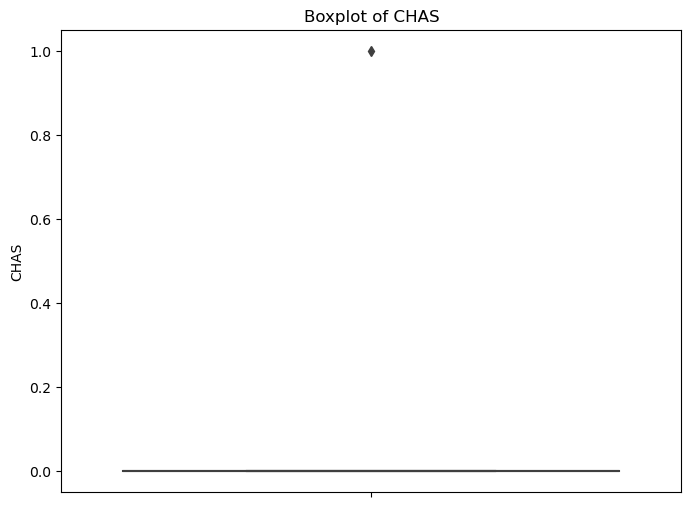

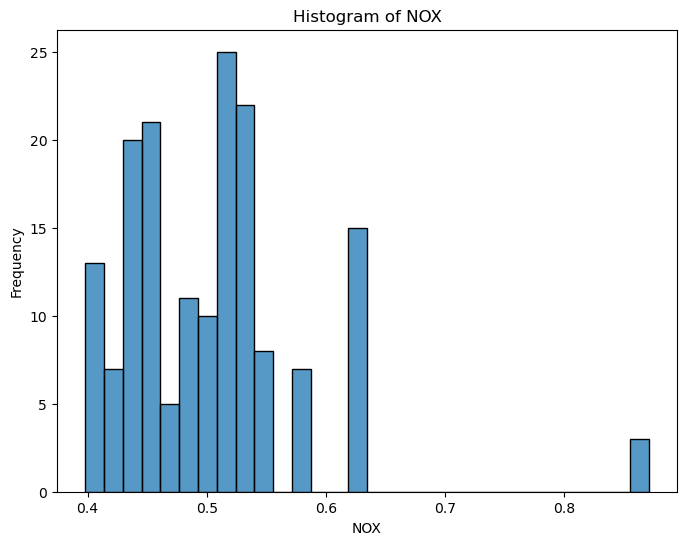

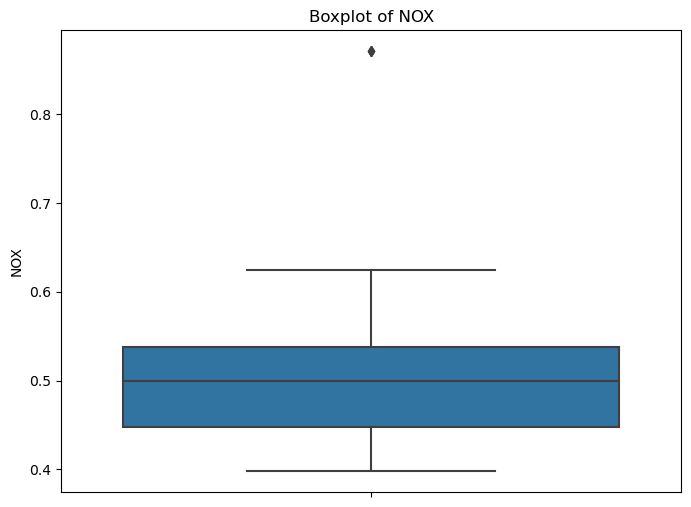

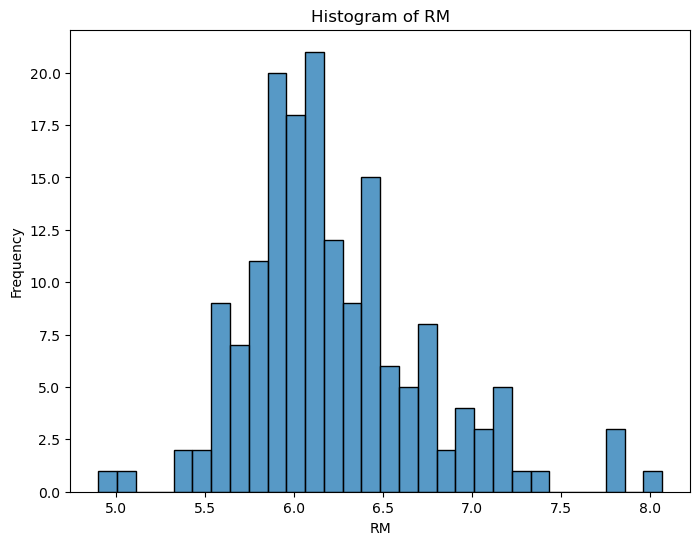

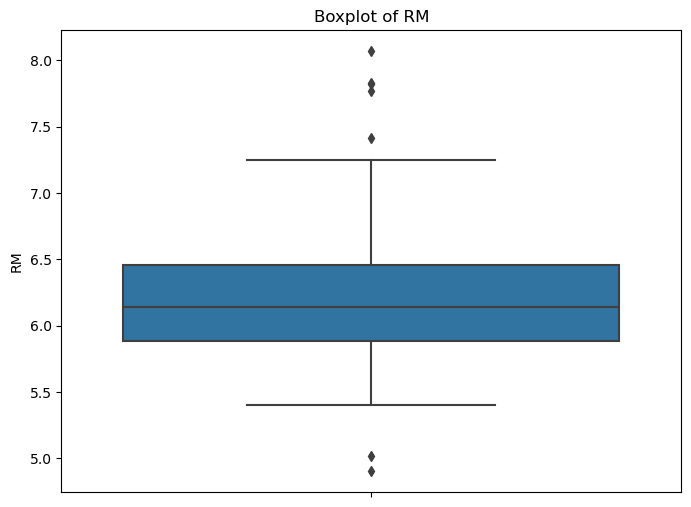

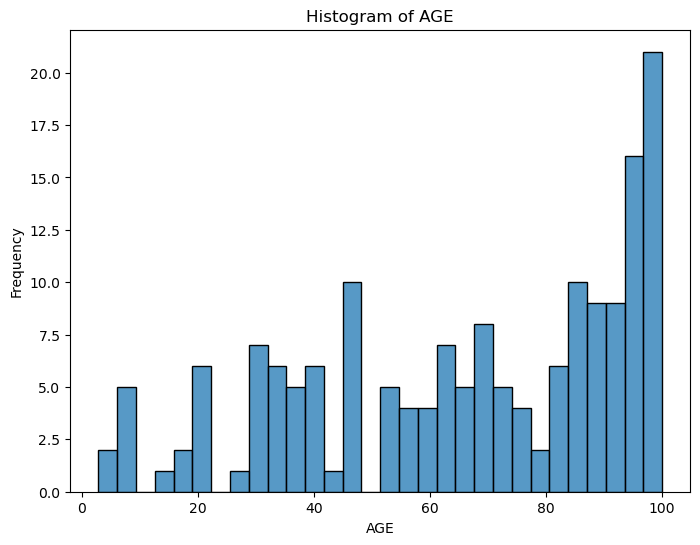

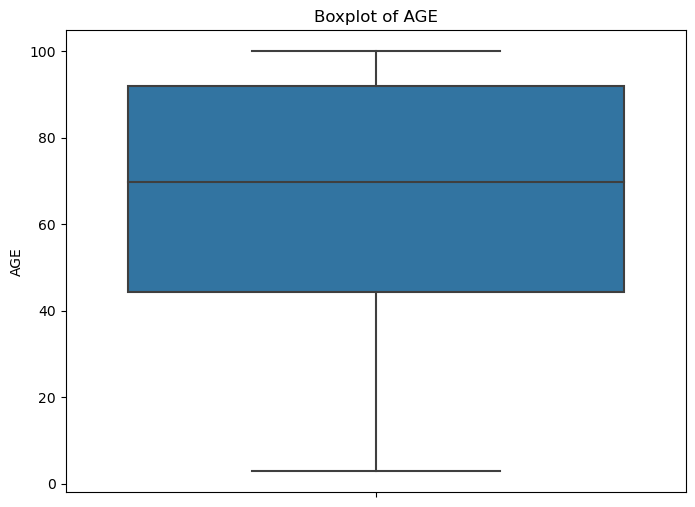

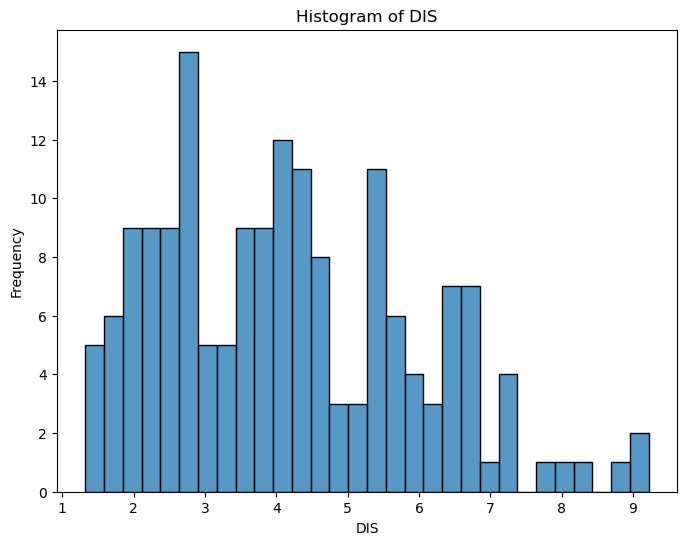

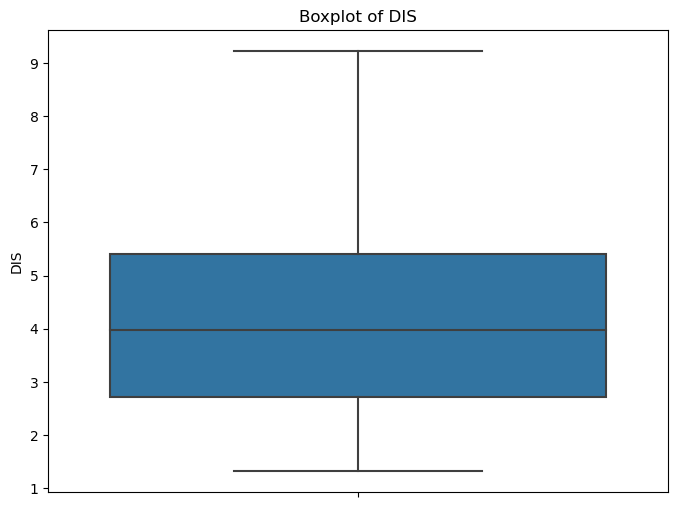

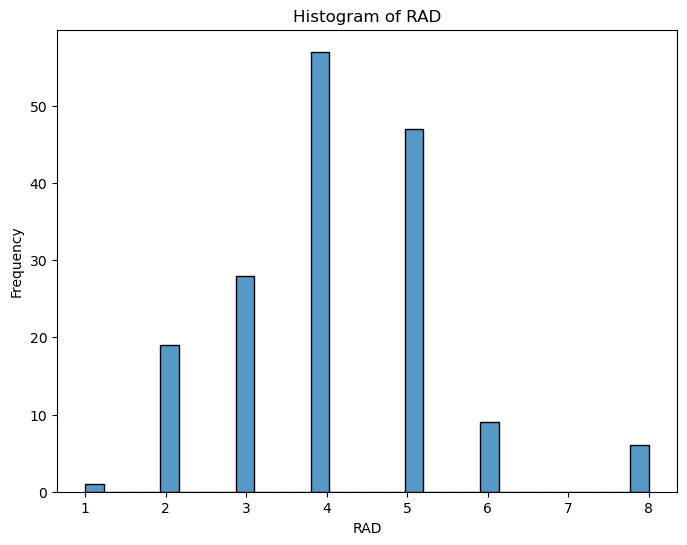

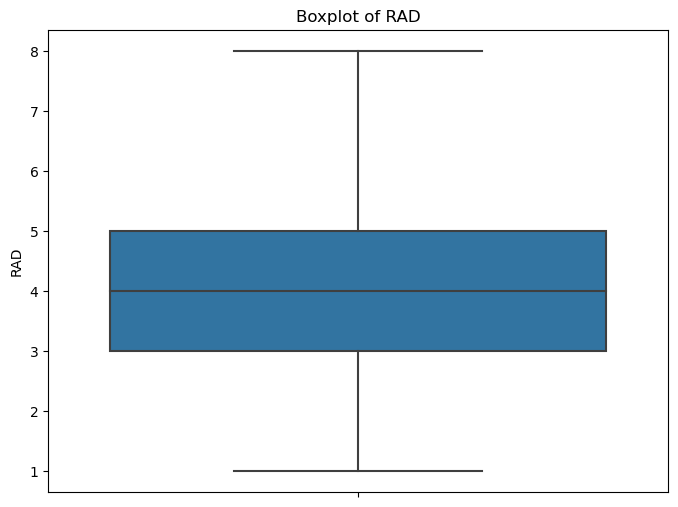

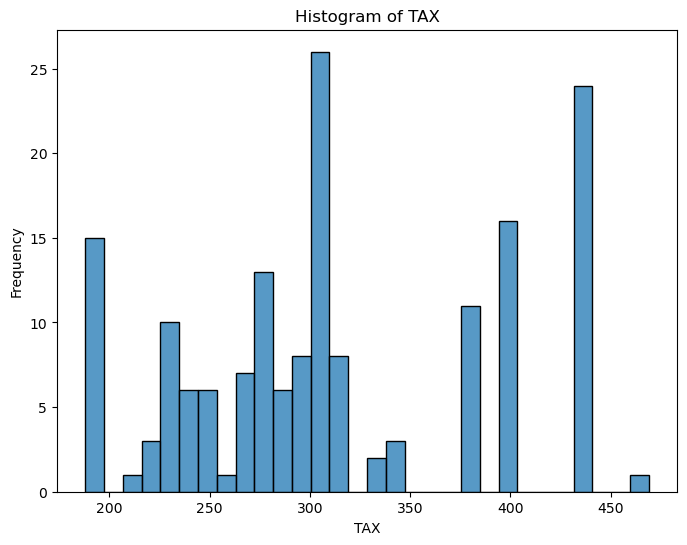

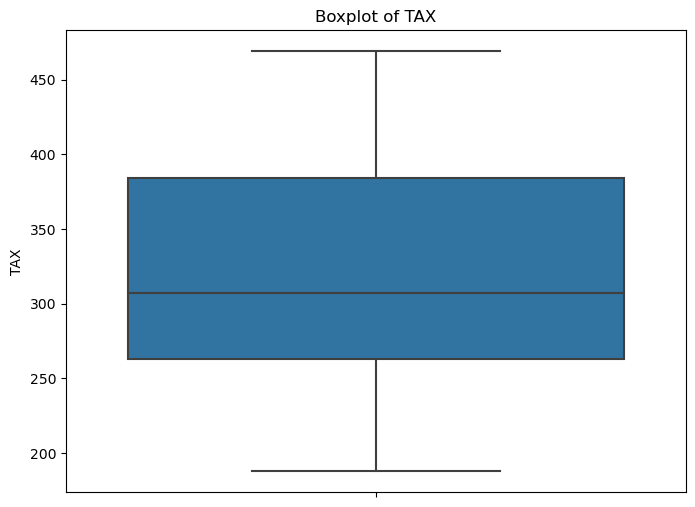

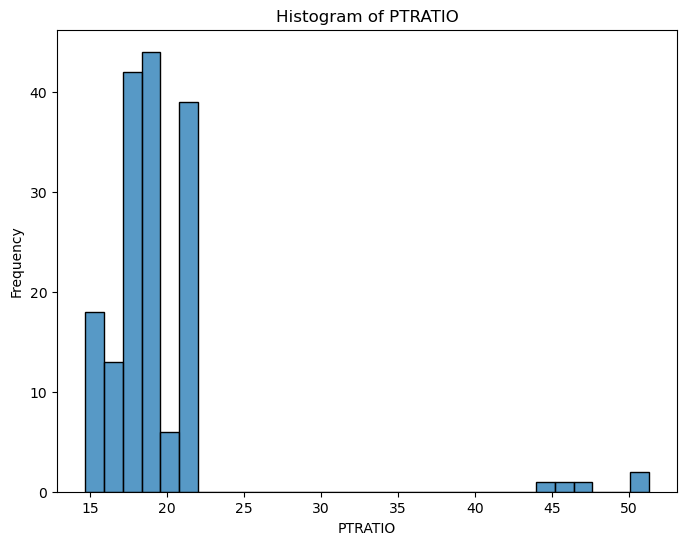

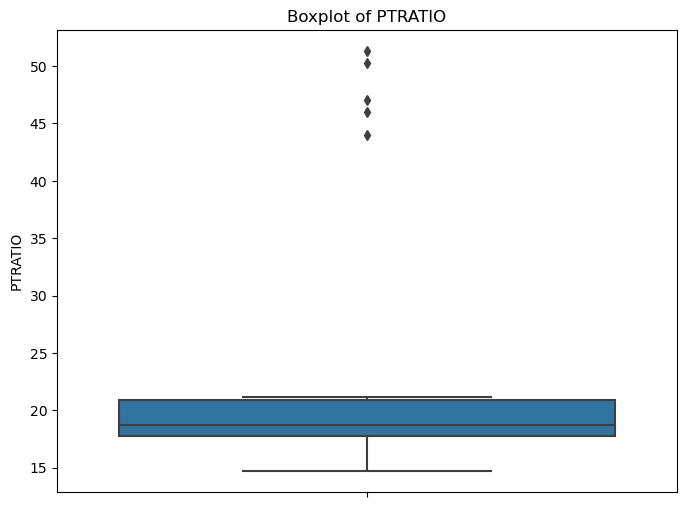

Skewed Variables: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'PTRATIO']
Variables with Extreme Values (Outliers): dict_keys(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'PTRATIO'])


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#numeric_housing_df = housing_df_impute.select_dtypes(include='number')

#Plot histograms for each quantitative variable
for column in housing_df_impute.columns:
    sns.histplot(housing_df_impute[column], kde=False, bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

#Compute standard deviation for each variable to analyze variability
std_devs = housing_df_impute.std()
largest_variability_variable = std_devs.idxmax()
print(f"The variable with the largest variability is '{largest_variability_variable}' with a standard deviation of {std_devs[largest_variability_variable]:.2f}.")


skewed_vars = []  # To store names of skewed variables
extreme_values = {}  # To store extreme values by variable

# Plot histograms and boxplots for each quantitative variable
for column in housing_df_impute.columns:
    # Histogram for visual check on skewness
    plt.figure(figsize=(8, 6))
    sns.histplot(housing_df_impute[column], kde=False, bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
    # Check for skewness using statistical measure
    skewness = housing_df_impute[column].skew()
    if abs(skewness) > 1:  # highly skewed
        skewed_vars.append(column)
    
    # Boxplot to check for extreme values (outliers)
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=housing_df_impute[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

    # Check for outliers using IQR
    Q1 = housing_df_impute[column].quantile(0.25)
    Q3 = housing_df_impute[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = housing_df_impute[(housing_df_impute[column] < (Q1 - 1.5 * IQR)) | 
                                 (housing_df_impute[column] > (Q3 + 1.5 * IQR))][column]
    if not outliers.empty:
        extreme_values[column] = outliers.tolist()

print("Skewed Variables:", skewed_vars)
print("Variables with Extreme Values (Outliers):", extreme_values.keys())


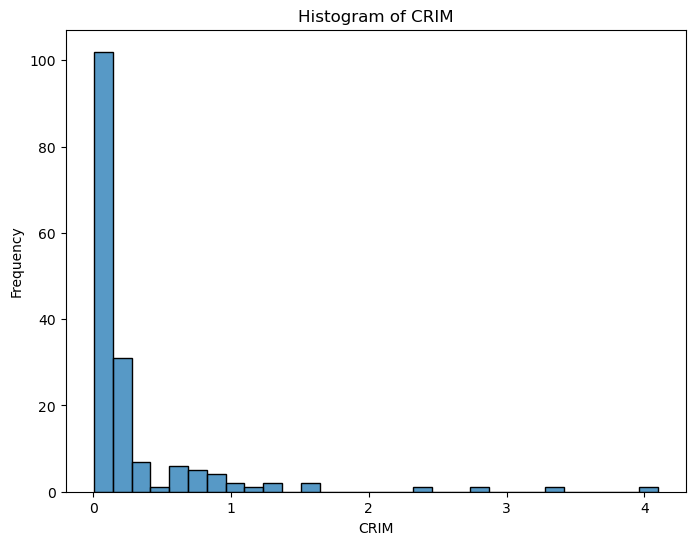

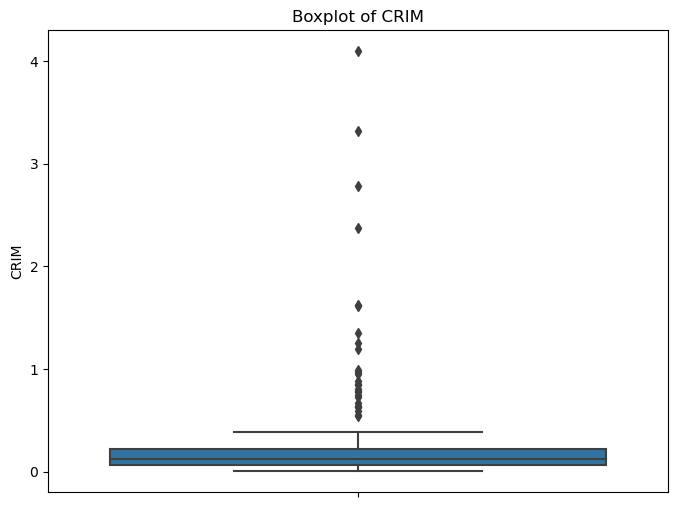

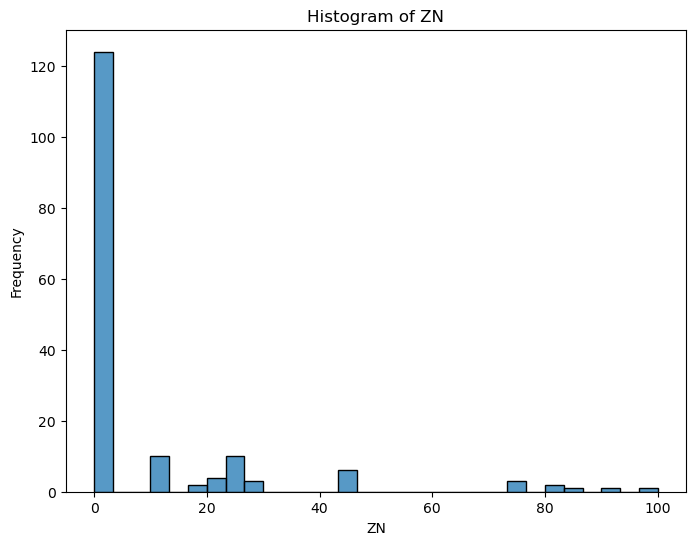

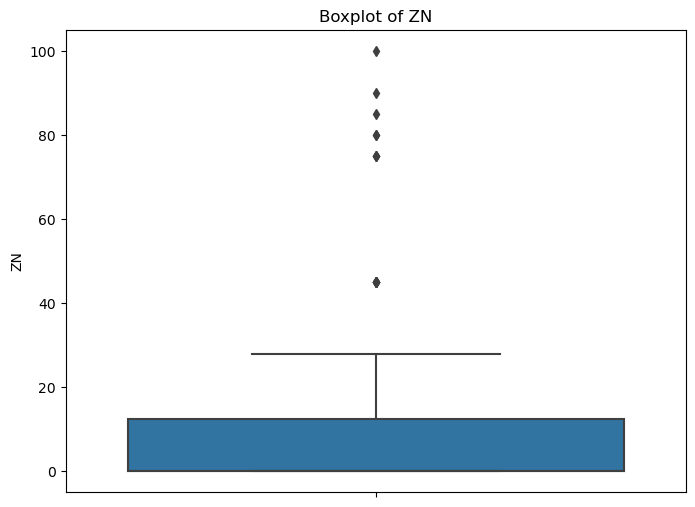

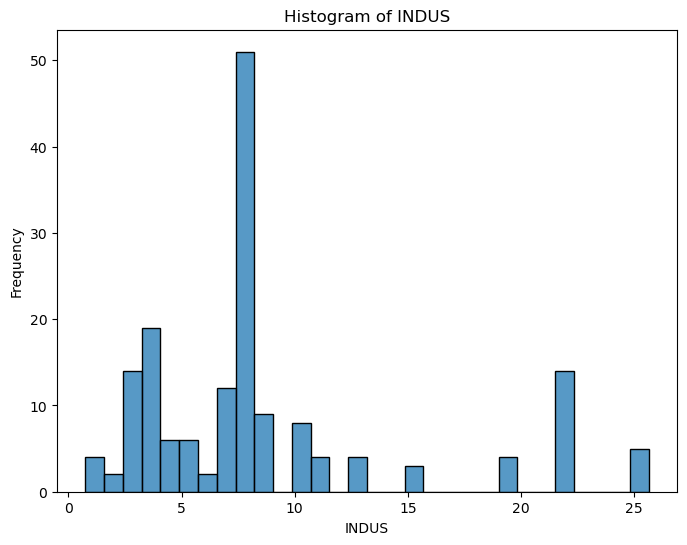

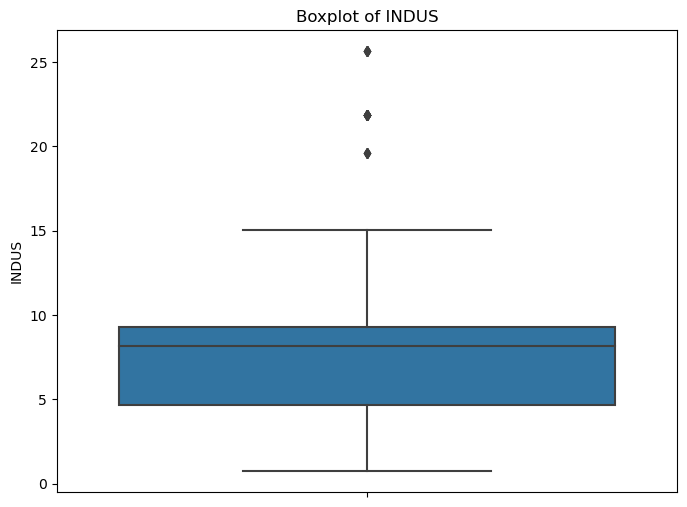

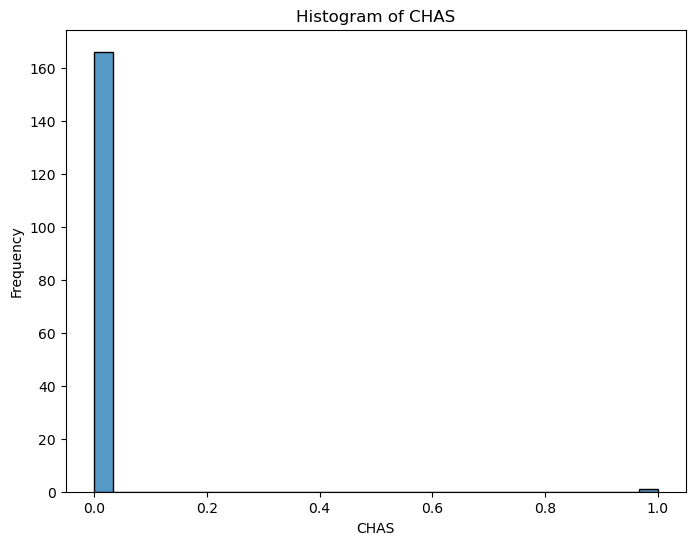

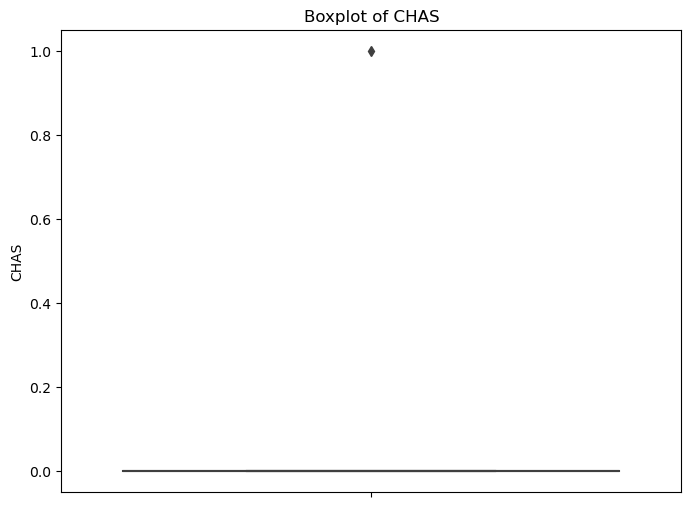

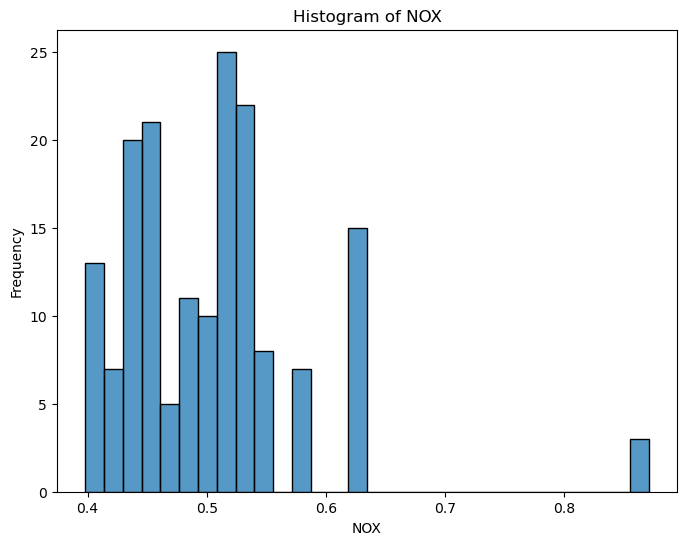

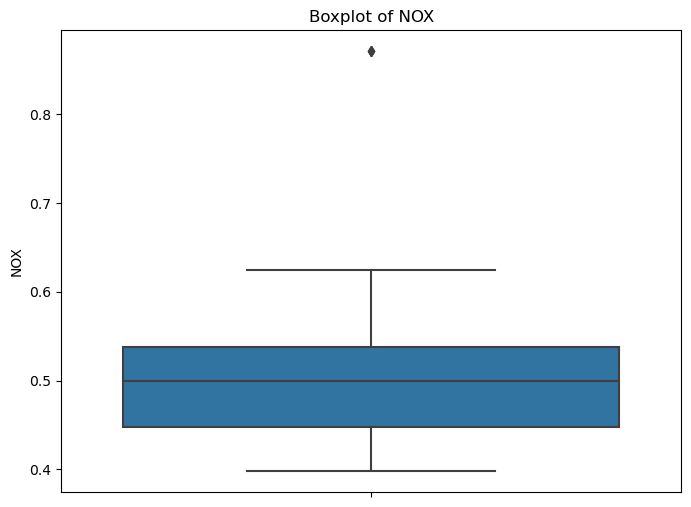

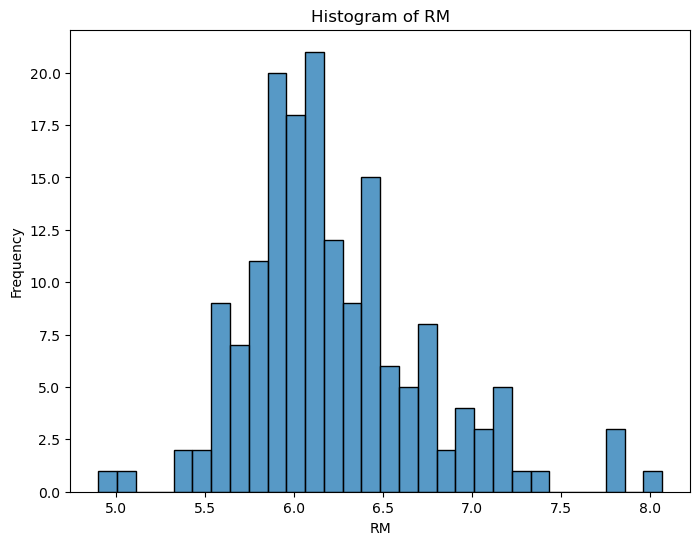

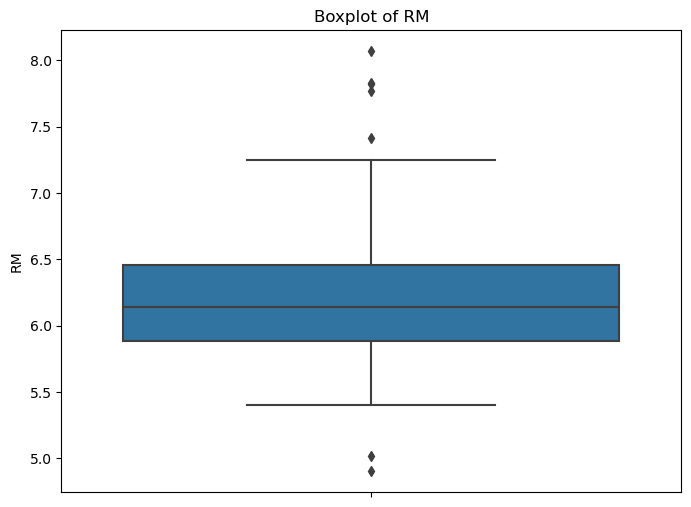

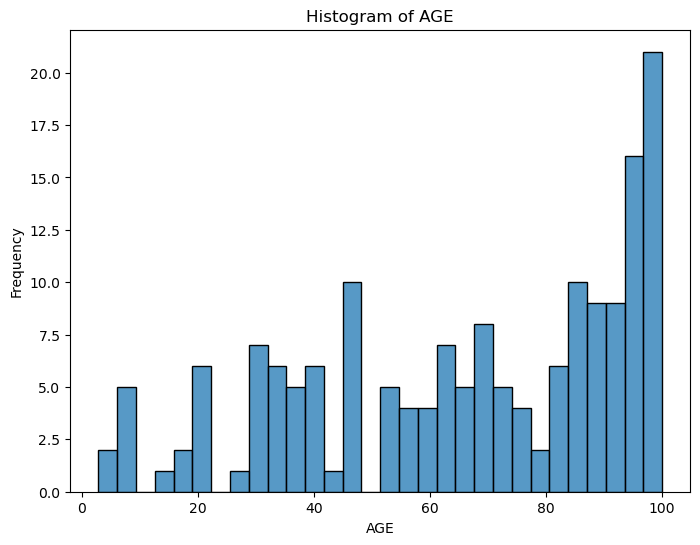

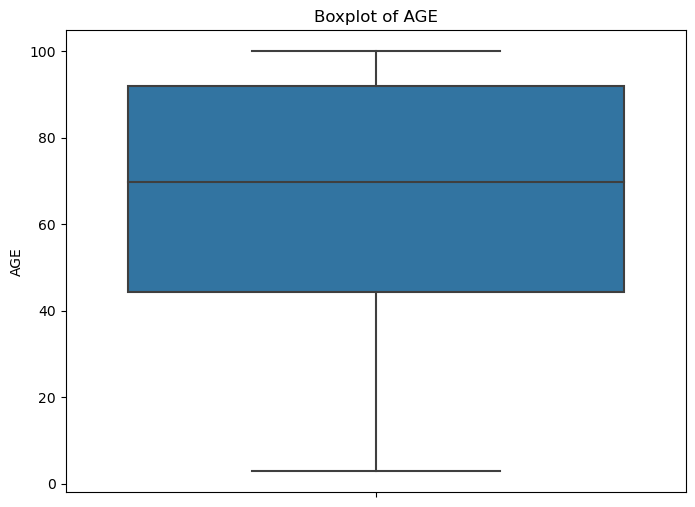

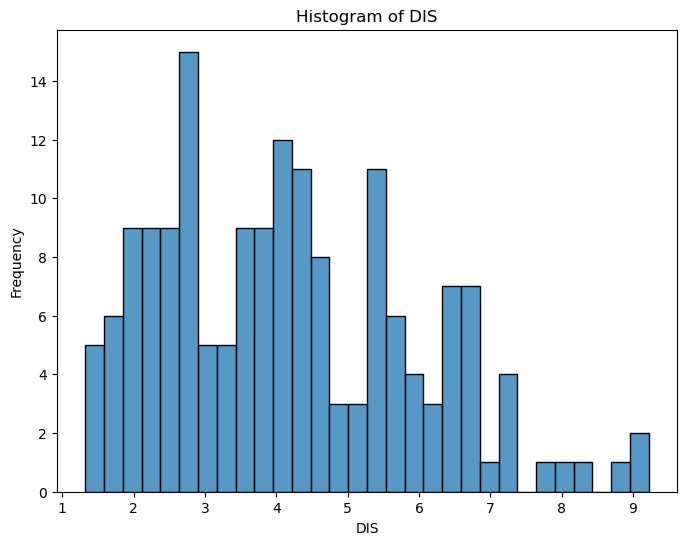

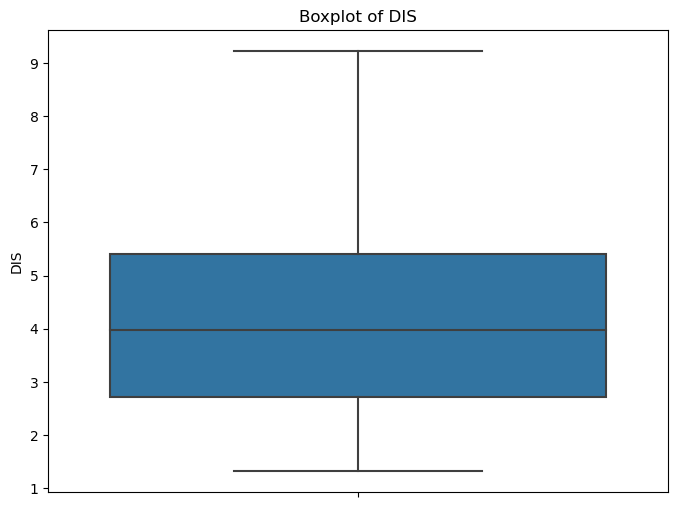

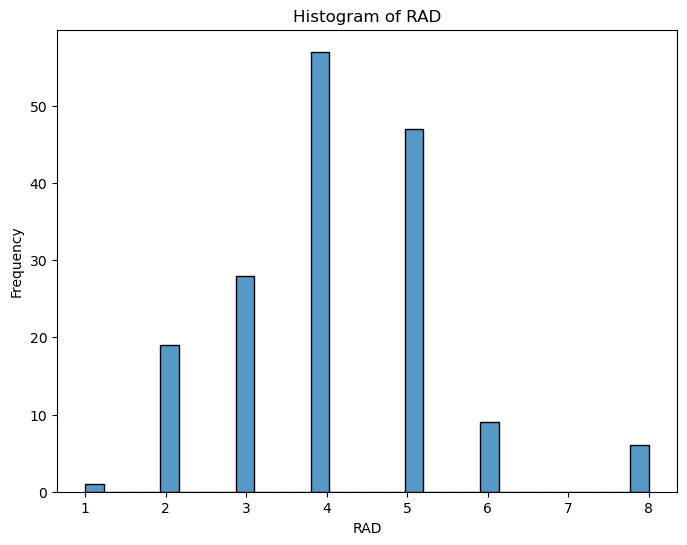

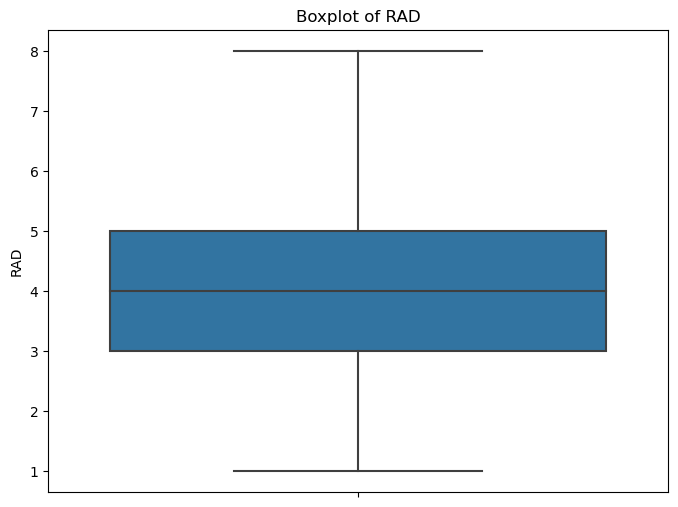

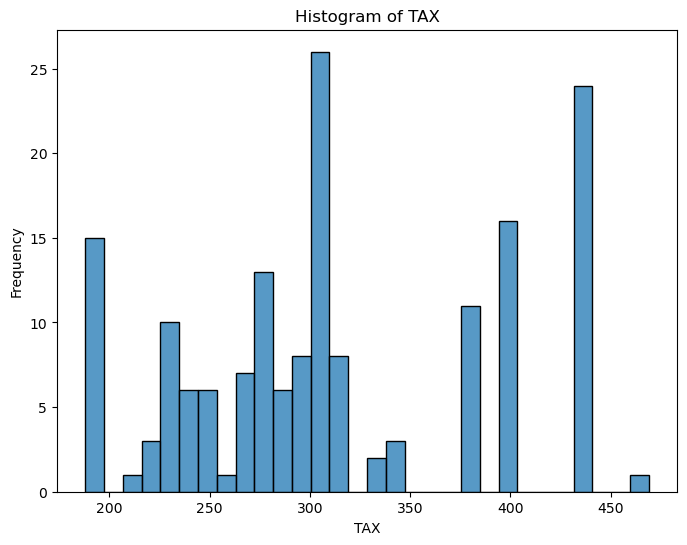

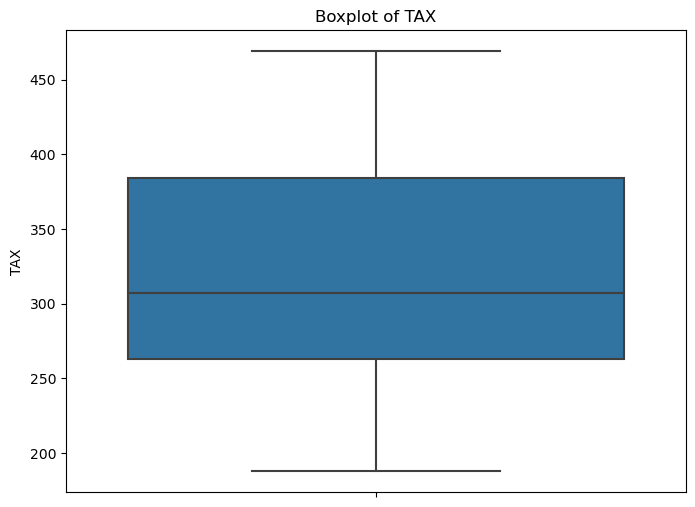

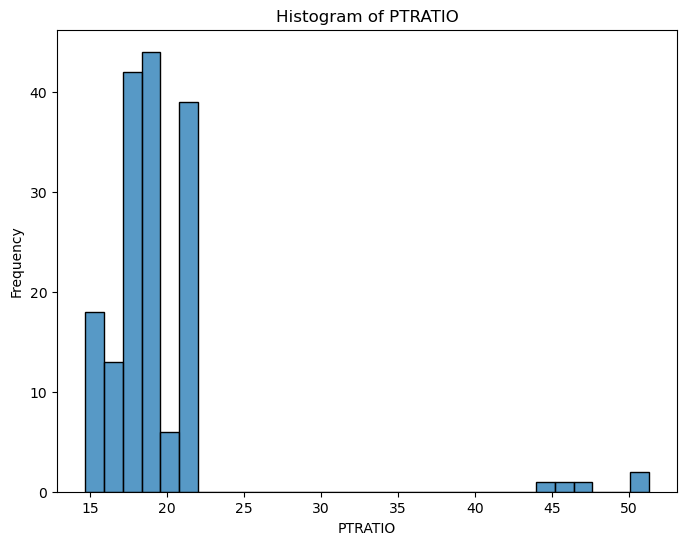

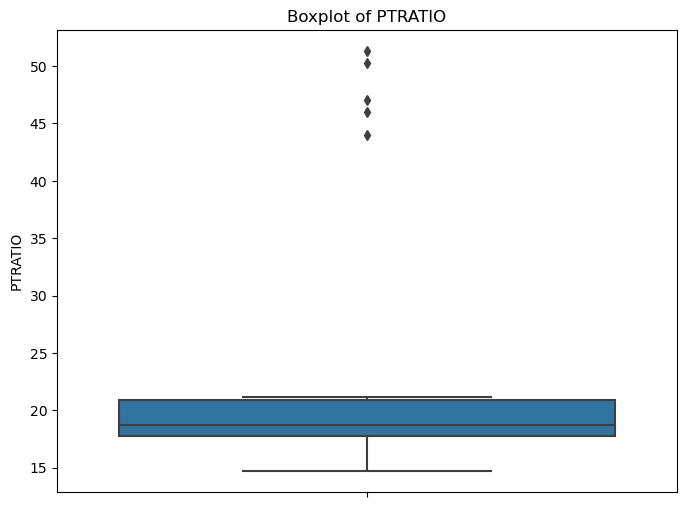

Skewed Variables: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'PTRATIO']
Variables with Extreme Values (Outliers): dict_keys(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'PTRATIO'])


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



skewed_vars = []  # To store names of skewed variables
extreme_values = {}  # To store extreme values by variable

# Plot histograms and boxplots for each quantitative variable
for column in housing_df_impute.columns:
    # Histogram for visual check on skewness
    plt.figure(figsize=(8, 6))
    sns.histplot(housing_df_impute[column], kde=False, bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
    # Check for skewness using statistical measure
    skewness = housing_df_impute[column].skew()
    if abs(skewness) > 1:  # highly skewed
        skewed_vars.append(column)
    
    # Boxplot to check for extreme values (outliers)
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=housing_df_impute[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

    # Check for outliers using IQR
    Q1 = housing_df_impute[column].quantile(0.25)
    Q3 = housing_df_impute[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = housing_df_impute[(housing_df_impute[column] < (Q1 - 1.5 * IQR)) | 
                                 (housing_df_impute[column] > (Q3 + 1.5 * IQR))][column]
    if not outliers.empty:
        extreme_values[column] = outliers.tolist()

print("Skewed Variables:", skewed_vars)
print("Variables with Extreme Values (Outliers):", extreme_values.keys())


In [34]:
housing_df_impute['PTRATIO'].median()

18.7

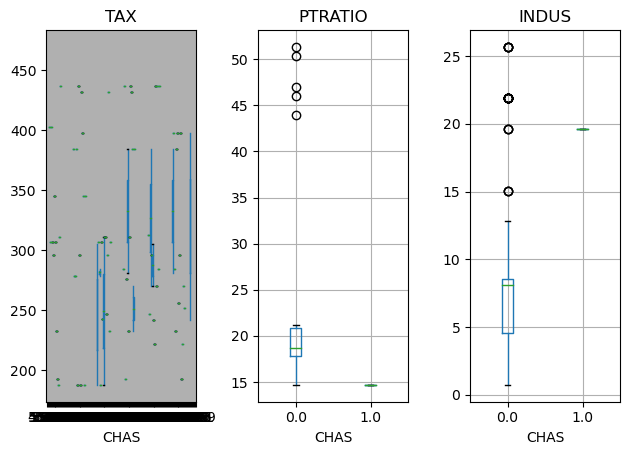

In [35]:
fig, axes = plt.subplots(nrows = 1, ncols = 3)
housing_df_impute.boxplot(column='TAX', by='RM', ax=axes[0])
housing_df_impute.boxplot(column='PTRATIO', by='CHAS', ax=axes[1])
housing_df_impute.boxplot(column='INDUS', by='CHAS', ax=axes[2])
for ax in axes:
    ax.set_xlabel('CHAS')
plt.suptitle('') # Suppress the overall title
plt.tight_layout() #Increase the separation between the plots

<AxesSubplot:>

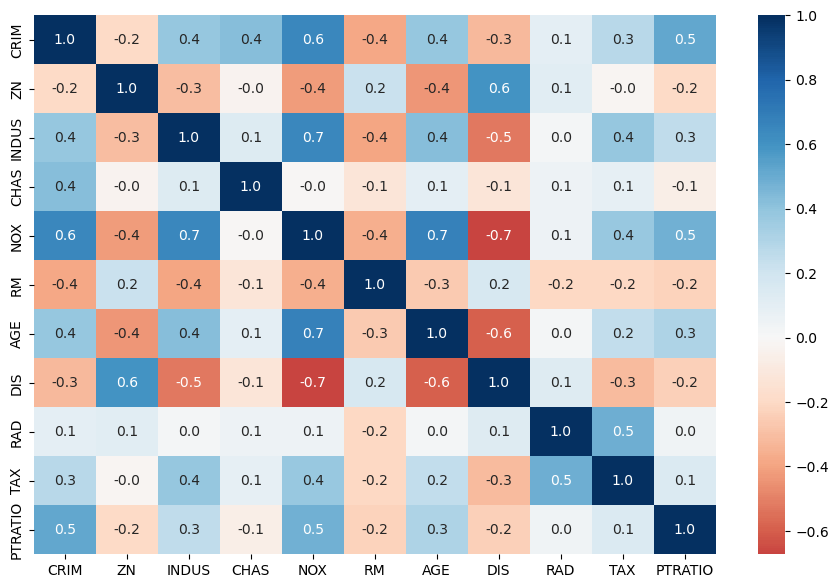

In [36]:
import seaborn as sns
corr = housing_df_impute.corr()

fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)